# E-health python analysis, Group 9

## Import Necessary packages and loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/Reza.Gonabadi/Downloads/dataset_project_eHealth20232024.csv')

data.tail(6)

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ccs_3,ccs_4,ccs_5,ccs_6,ccs_7,ccs_8,ccs_9,ccs_10,ccs_11,ccs_12
154,53.0,2,8.0,1,13000,0,0.0,1.0,0,0,...,0.0,4.0,0.0,0.0,5,4,2,0,3,0
155,29.0,2,18.0,0,25000,0,2.0,0.0,2,0,...,4.0,4.0,0.0,6.0,6,0,2,3,2,5
156,40.0,1,13.0,5,27000,2,1.0,2.0,0,2,...,6.0,1.0,1.0,1.0,1,6,0,0,0,6
157,40.0,0,13.0,0,26000,0,0.0,2.0,1,0,...,4.0,6.0,0.0,2.0,2,0,4,2,1,4
158,41.0,1,8.0,1,11000,0,NaN,1.0,0,0,...,0.0,1.0,0.0,1.0,3,4,0,0,4,2
159,55.0,0,8.0,2,32199,0,0.0,0.0,0,0,...,2.0,1.0,0.0,6.0,4,5,5,0,1,1


## Keeping columns which are related to mental health problem

In [ ]:
columns_to_keep = ['age','gender','education','marital','income','phq_1','phq_2','phq_3','phq_4','phq_5','phq_6','phq_7','phq_8','phq_9','gad_1','gad_2','gad_3','gad_4','gad_5','gad_6','gad_7']

data_new= data[columns_to_keep]
print (data_new)


      age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    NaN    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
155  29.0       2       18.0        0   25000      0    2.0    0.0      2   
156  40.0       1       13.0        5   27000      2    1.0    2.0      0   
157  40.0       0       13.0        0   26000      0    0.0    2.0      1   
158  41.0       1        8.0        1   11000      0    NaN    1.0      0   
159  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  phq_7  phq_8  phq_9  gad_1  gad_2  gad_3  gad_4  gad_5  \


## Identify columns which contain NULL value

In [ ]:
columns_with_missing_values = data_new.columns[data_new.isnull().any()].tolist()
print (columns_with_missing_values)


['age', 'education', 'phq_2', 'phq_3', 'phq_7', 'phq_8', 'phq_9', 'gad_1', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7']


## Replacing NULL value with mode and median technique

In [ ]:
for column in columns_with_missing_values:
    if data_new[column].dtype == 'object':
        mode_value = data_new[column].mode().iloc[0]
        data_new[column].fillna(mode_value, inplace=True)
    else:
        median_value = data_new[column].median()
        data_new[column].fillna(median_value, inplace=True)

    print(data_new)

data = data_new.copy()

      age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    NaN    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
155  29.0       2       18.0        0   25000      0    2.0    0.0      2   
156  40.0       1       13.0        5   27000      2    1.0    2.0      0   
157  40.0       0       13.0        0   26000      0    0.0    2.0      1   
158  41.0       1        8.0        1   11000      0    NaN    1.0      0   
159  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  phq_7  phq_8  phq_9  gad_1  gad_2  gad_3  gad_4  gad_5  \


      age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    0.0    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
155  29.0       2       18.0        0   25000      0    2.0    0.0      2   
156  40.0       1       13.0        5   27000      2    1.0    2.0      0   
157  40.0       0       13.0        0   26000      0    0.0    2.0      1   
158  41.0       1        8.0        1   11000      0    0.0    1.0      0   
159  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  phq_7  phq_8  phq_9  gad_1  gad_2  gad_3  gad_4  gad_5  \


C:\Users\Reza.Gonabadi\AppData\Local\Temp\ipykernel_2208\3699181288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[column].fillna(median_value, inplace=True)
C:\Users\Reza.Gonabadi\AppData\Local\Temp\ipykernel_2208\3699181288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[column].fillna(median_value, inplace=True)
C:\Users\Reza.Gonabadi\AppData\Local\Temp\ipykernel_2208\3699181288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

## Bar chart of Distribution of GAD Responses

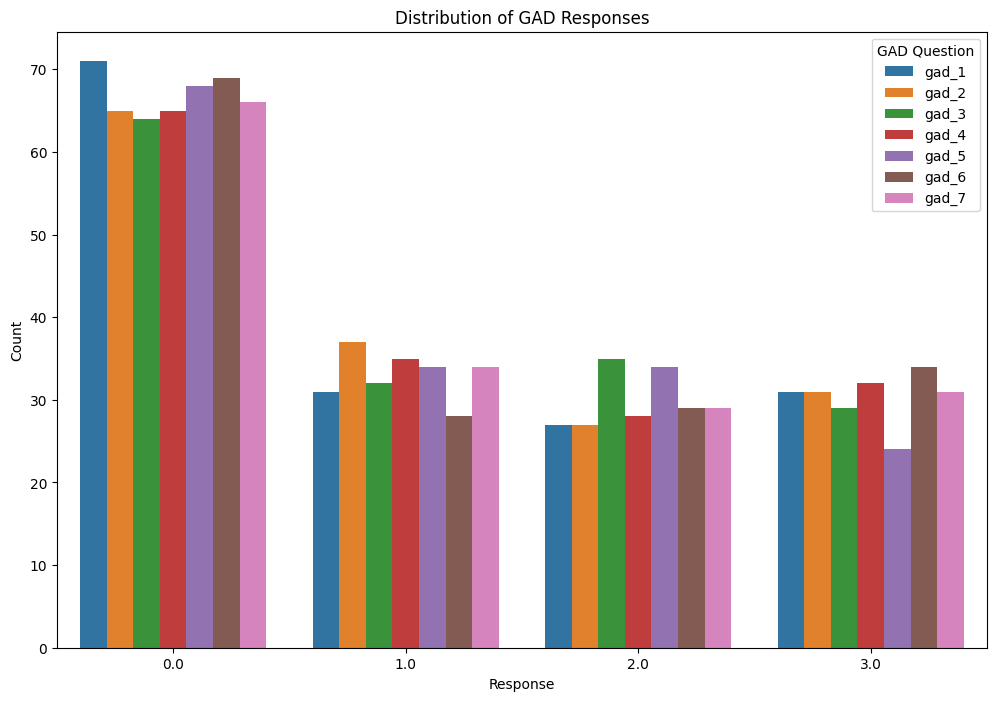

In [ ]:
import seaborn as sns
# Bar chart for GAD
gad_columns = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7']
gad_data = data[gad_columns].melt(var_name='GAD Question', value_name='Response')
plt.figure(figsize=(12, 8))
sns.countplot(x='Response', hue='GAD Question', data=gad_data)
plt.title('Distribution of GAD Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='GAD Question')
plt.show()

## Bar chart of Distribution of PHQ-9 Responses

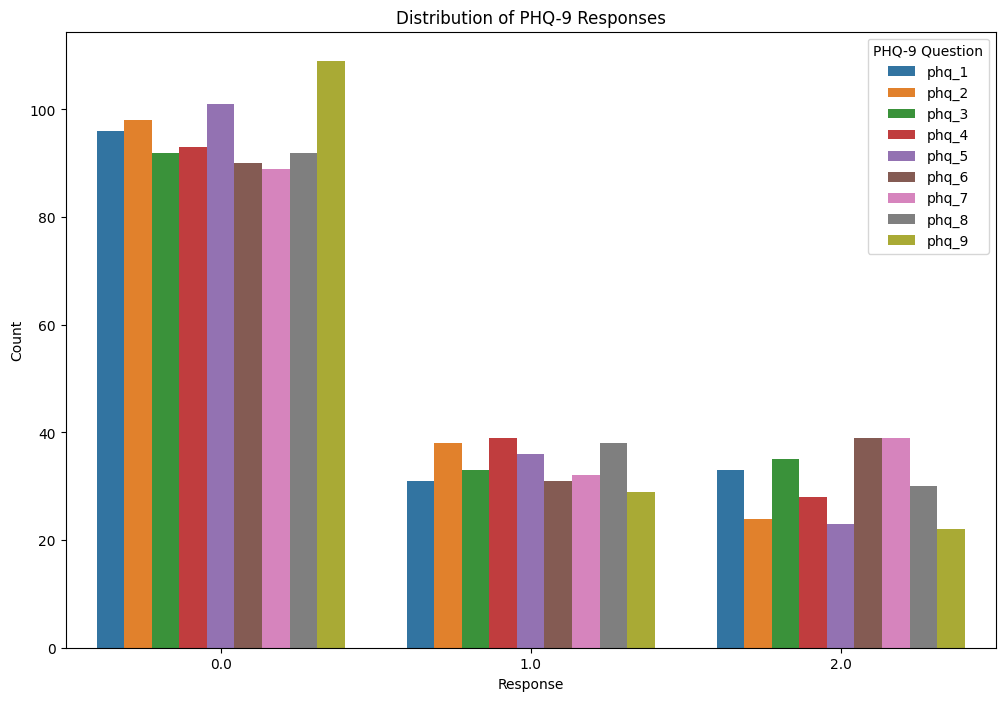

In [ ]:
# Bar chart for PHQ-9
phq9_columns = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9']
phq9_data = data[phq9_columns].melt(var_name='PHQ-9 Question', value_name='Response')
plt.figure(figsize=(12, 8))
sns.countplot(x='Response', hue='PHQ-9 Question', data=phq9_data)
plt.title('Distribution of PHQ-9 Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='PHQ-9 Question')
plt.show()

Based on this data exploratory we divide the datasets into 3 category:
1) Normal subjects
2) Moderate mental health subjects
3) Extreme mental health subjects

Subjects who answering the questions mostly last questions and the third one would be in "Extreme mental health subjects" category and subjects who mostly answer the questions with second or third options will be in "Moderate mental health subjects" and the left would be the "Normal Subjects".


## Converting our all data into int

In [ ]:
# convert all the data into int
data = data.astype(int)

## Sum of two arrays function

In [ ]:
def sum_arrays(array1, array2):
    # Check if the arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length")

    # Sum the corresponding elements
    result = [x + y for x, y in zip(array1, array2)]
    return result

## Counting each answers of questions

In [ ]:
def counting_answers(columns: str, answer: int):

    c0 = 0 #Never
    c1 = 0 #Some days
    c2 = 0 #More than half
    c3 = 0 #Almost every day

    if columns[:3] == "phq":
        if answer == 0:
            c0 = c0 + 1
        elif answer == 1:
            c1 = c1 + 1
        elif answer == 2:
            c2 = c2 + 1
        elif answer == 3:
            c3 = c3 + 1
    elif columns[:3] == "gad":
        if answer == 0:
            c0 = c0 + 1
        elif answer == 1:
            c1 = c1 + 1
        elif answer == 2:
            c2 = c2 + 1
        elif answer == 3:
            c3 = c3 + 1
    output_array = [c0,c1,c2,c3]
    ##print(output_array)
    return output_array

## Labeling the subjects

In [ ]:
def labeling_subjects(input_list):
    if input_list[3] > 5:
        output = 3 # Extreme mental health subjects
    elif input_list[0] > 8 :
        output = 1 # Normal subjects
    else:
        output = 2 # Moderate mental health subjects
    return output

In [ ]:
import pandas as pd

# Iterate through rows and columns
my_output_list = []
for index, row in data.iterrows():
    ##print(f"Row {index}:")
    array1 = [0 , 0 , 0, 0]
    for column, value in row.items():
        ##print(f"  {column}: {value}")
        array2 = counting_answers(column,value)
        result = sum_arrays(array1, array2)
        array1 = result[:]
    my_output_list.append(labeling_subjects(array1))

print('The lenght of the output array : ',len(my_output_list))
print('output label : ', my_output_list)

The lenght of the output array :  160
output label :  [1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1]


## Counting each values in output arrays

In [ ]:
from collections import Counter

# Count occurrences of each value
value_counts = Counter(my_output_list)

# Display the counts
for value, count in value_counts.items():
    print(f"Value {value} occurs {count} times.")

Value 1 occurs 63 times.
Value 2 occurs 85 times.
Value 3 occurs 12 times.


## Concat the output and data

In [ ]:
# Convert the array to a DataFrame
array_df = pd.DataFrame({'Result': my_output_list})
# Concatenate the two DataFrames along the desired axis (0 for vertical, 1 for horizontal)
data_result = pd.concat([data, array_df], axis=1)

In [ ]:
data_result

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,phq_8,phq_9,gad_1,gad_2,gad_3,gad_4,gad_5,gad_6,gad_7,Result
0,42,1,5,1,18000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,51,3,18,1,23000,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
2,40,0,8,1,10000,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,1
3,19,0,25,5,31000,2,1,0,0,2,...,0,0,3,3,2,3,3,2,3,2
4,42,2,13,1,40000,0,0,0,0,1,...,1,0,2,0,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,29,2,18,0,25000,0,2,0,2,0,...,1,0,3,0,1,3,0,3,3,2
156,40,1,13,5,27000,2,1,2,0,2,...,0,1,0,1,2,0,2,0,2,2
157,40,0,13,0,26000,0,0,2,1,0,...,0,2,0,2,0,1,1,0,2,1
158,41,1,8,1,11000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


## Calculate the average of each attributes for each group

In [ ]:
# Group by 'result' and calculate the average for each group
result_avg = data_result.groupby('Result').mean()

# Display the result
print(result_avg)

              age    gender  education   marital        income     phq_1  \
Result                                                                     
1       45.031746  1.793651  10.555556  1.888889  22882.492063  0.190476   
2       36.317647  1.470588  15.776471  1.258824  33011.752941  0.858824   
3       25.416667  1.416667  20.750000  1.500000  35050.000000  1.000000   

           phq_2     phq_3     phq_4     phq_5  ...     phq_7     phq_8  \
Result                                          ...                       
1       0.206349  0.253968  0.333333  0.285714  ...  0.412698  0.174603   
2       0.776471  0.870588  0.776471  0.647059  ...  0.858824  0.917647   
3       0.583333  1.083333  0.666667  0.750000  ...  0.916667  0.750000   

           phq_9     gad_1     gad_2     gad_3     gad_4     gad_5     gad_6  \
Result                                                                         
1       0.222222  0.412698  0.412698  0.428571  0.380952  0.380952  0.301587   
2  

Based on this average analysis we can find that for
1) Normal subjects : average age is 45, income is 23k
2) Moderate mental health subjects : average age is 36 , income is 33k
3) Extreme mental health subjects : average age is 25 , income is 35k


## Gender percentage per each class

In [ ]:
# Convert 'gender' column to string labels for better interpretation
data_result['gender'] = data_result['gender'].map({0: 'Male', 1: 'Female', 2: 'Non-binary', 3: 'Prefer not to say'})

# Calculate the percentage of each category within each label
result_percentage = data_result.groupby('Result').apply(lambda x: x['gender'].value_counts(normalize=True)).unstack(fill_value=0) * 100

# Rename the columns for better interpretation
result_percentage.columns = [f'{col}_percentage' for col in result_percentage.columns]

# Display the result
print(result_percentage)

        Female_percentage  Male_percentage  Non-binary_percentage  \
Result                                                              
1               25.396825        15.873016              22.222222   
2               23.529412        27.058824              24.705882   
3               33.333333        25.000000              16.666667   

        Prefer not to say_percentage  
Result                                
1                          36.507937  
2                          24.705882  
3                          25.000000  


As you can see for example 33 percent of 'Extreme mental health subjects' are Females subjects

## Education percentage per each class

In [ ]:
# Convert 'educational' column to string labels for better interpretation
data_result['education'] = data_result['education'].map({5: 'Elementary school', 8: 'Middle school',
                                                         13: 'High School', 18: 'Bachelor Degree',
                                                         22: 'Master Degree', 25: ' Doctoral Degree'})

# Calculate the percentage of each category within each label
result_percentage = data_result.groupby('Result').apply(lambda x: x['education'].value_counts(normalize=True)).unstack(fill_value=0) * 100

# Rename the columns for better interpretation
result_percentage.columns = [f'{col}_percentage' for col in result_percentage.columns]

# Display the result
print(result_percentage)

         Doctoral Degree_percentage  Bachelor Degree_percentage  \
Result                                                            
1                          0.000000                   11.111111   
2                          7.058824                   28.235294   
3                         16.666667                   25.000000   

        Elementary school_percentage  High School_percentage  \
Result                                                         
1                          12.698413               36.507937   
2                           0.000000               38.823529   
3                           0.000000                8.333333   

        Master Degree_percentage  Middle school_percentage  
Result                                                      
1                       0.000000                 39.682540  
2                      12.941176                 12.941176  
3                      50.000000                  0.000000  


As you can see for example 38 percent of 'Moderate mental health subjects' have High School degree

## Martial percentage per each class

In [ ]:
# Convert 'martial' column to string labels for better interpretation
data_result['marital'] = data_result['marital'].map({0: 'Single', 1: 'Married',
                                                   2: 'Divorced', 3: 'Widowed',
                                                  4:'Separated',5: 'Prefer not to say' })

# Calculate the percentage of each category within each label
result_percentage = data_result.groupby('Result').apply(lambda x: x['marital'].value_counts(normalize=True)).unstack(fill_value=0) * 100

# Rename the columns for better interpretation
result_percentage.columns = [f'{col}_percentage' for col in result_percentage.columns]

# Display the result
print(result_percentage)

        Divorced_percentage  Married_percentage  Prefer not to say_percentage  \
Result                                                                          
1                 20.634921           50.793651                      3.174603   
2                 11.764706           44.705882                      9.411765   
3                 25.000000           16.666667                     16.666667   

        Separated_percentage  Single_percentage  Widowed_percentage  
Result                                                               
1                  14.285714           3.174603            7.936508  
2                   0.000000          30.588235            3.529412  
3                   0.000000          41.666667            0.000000  


As you can see for example 50 percent of 'Normal subjects' are married!